In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [91]:
sample_data = pd.read_csv('sample_census2_100.csv')
sample_data.head()

,Unnamed: 0,Id,zip_code,total,non_hispanic_tot,Not Hispanic or Latino householder: - Householder who is White alone,Not Hispanic or Latino householder: - Householder who is Black or African American alone,Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone,Not Hispanic or Latino householder: - Householder who is Asian alone,Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone,...,Geography_zip,per_capita_income_2017_estimate,per_capita_income_2017_margin,white_tot,black_tot,indian_tot,asian_tot,native_tot,other_tot,mixed_tot
0,0,8600000US01850,1850,5680,5056,4484,204,5,248,0,...,ZCTA5 01850,19486.0,1964.0,5680,4737,221,8,249,0,312
1,1,8600000US99502,99502,6576,6358,5192,226,301,403,24,...,ZCTA5 99502,41256.0,2823.0,6576,5292,231,313,407,26,81
2,2,8600000US33126,33126,15244,946,699,94,8,101,4,...,ZCTA5 33126,17570.0,970.0,15244,13432,322,23,105,6,810
3,3,8600000US10035,10035,11169,5865,483,5033,23,88,1,...,ZCTA5 10035,21618.0,1727.0,11169,2426,5594,83,93,8,2402
4,4,8600000US10029,10029,27465,12873,2688,8557,63,945,2,...,ZCTA5 10029,27966.0,1641.0,27465,8159,9960,225,977,18,6592


In [92]:
#add back the trailing 0's
sample_data['zip_code'] = sample_data['zip_code'].astype('str')
fun = lambda x : '0'+ str(x) if len(x) == 4 else ('00'+ str(x) if len(x) == 3 else str(x))
sample_data['zip_code'] = sample_data['zip_code'].apply(fun)

In [103]:
sample_data['chinese_count'] = 0
sample_data['ch_tot_review_ct'] = 0
sample_data['ch_avg_review_ct'] = 0
sample_data['ch_avg_rating'] = 0
from config import api_key
base_url = 'https://api.yelp.com/v3/businesses/search?'
head = {'Authorization': 'Bearer '+ api_key}
params = {
    'categories': 'chinese',
    'limit': 50, #max limit is 50
    'radius': 3000
       }
for index,row in sample_data.iterrows():
    params['location'] = row['zip_code']
    output = requests.get(base_url, params, headers=head).json()
    mexican_count = len(output['businesses'])
    tot_review_count = 0
    tot_rating = 0
    try:
        for restaurant in output['businesses']:
            tot_review_count += restaurant['review_count']
            tot_rating += restaurant['rating']

        sample_data.loc[index,'chinese_count'] = output['total']
        sample_data.loc[index,'ch_tot_review_ct'] = tot_review_count
        sample_data.loc[index,'ch_avg_review_ct'] = round(tot_review_count/mexican_count,2)
        sample_data.loc[index,'ch_avg_rating'] = round(tot_rating/mexican_count,2)
    except ZeroDivisionError:
        print('division by zero')
        

In [112]:
sample_data['fastfood_count'] = 0
sample_data['ff_tot_review_ct'] = 0
sample_data['ff_avg_review_ct'] = 0
sample_data['ff_avg_rating'] = 0
from config import api_key
base_url = 'https://api.yelp.com/v3/businesses/search?'
head = {'Authorization': 'Bearer '+ api_key}
params = {
    'categories': 'hotdogs',
    'limit': 50, #max limit is 50
    'radius': 3000,
    'offset':0
       }
for index,row in sample_data.iterrows():
    params['location'] = row['zip_code']
    output = requests.get(base_url, params, headers=head).json()
    tot_count = output['total']
    tot_review_count = 0
    tot_rating = 0
    for restaurant in output['businesses']:
        tot_review_count += restaurant['review_count']
        tot_rating += restaurant['rating']
    if tot_count <= params['limit']:
        pass
    else:
        num = params['limit']
        while num < tot_count:
            params['offest'] = num
            output = requests.get(base_url, params, headers=head).json()
            for restaurant in output['businesses']:
                tot_review_count += restaurant['review_count']
                tot_rating += restaurant['rating']
            num += params['limit']
    try:
        sample_data.loc[index,'fastfood_count'] = output['total']
        sample_data.loc[index,'ff_tot_review_ct'] = tot_count
        sample_data.loc[index,'ff_avg_review_ct'] = round(tot_review_count/tot_count,2)
        sample_data.loc[index,'ff_avg_rating'] = round(tot_rating/tot_count,2)
    except ZeroDivisionError:
        print('division by zero')
        

division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero


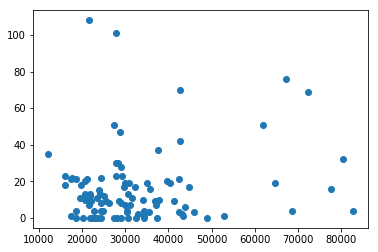

In [113]:
plt.scatter(sample_data['per_capita_income_2017_estimate'],sample_data['fastfood_count'])

In [114]:
pprint(output)

{'businesses': [{'alias': 'jon-smith-subs-boca-raton-3',
                 'categories': [{'alias': 'hotdogs', 'title': 'Fast Food'},
                                {'alias': 'sandwiches', 'title': 'Sandwiches'},
                                {'alias': 'delis', 'title': 'Delis'}],
                 'coordinates': {'latitude': 26.3720813,
                                 'longitude': -80.2037649},
                 'display_phone': '(561) 479-3339',
                 'distance': 2623.5153876370014,
                 'id': '_5z0z_KUq88QtBzyXFpfPw',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/Ec223Daw1aagZWlmAIOENw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '20401 S State Road 7',
                              'address2': '',
                              'address3': '',
                              'city': 'Boca Raton',
                              'country': 'US',
                              'display_address': ['20

In [115]:
len(output['businesses'])

13